![This is an image](Quant-Trading.jpg)

<font size="3">
Please visit our website <a href="https://www.quant-trading.co" target="_blank">quant-trading.co</a> for more tools on quantitative finance and data science.
</font>

In [1]:
# !pip install pandas-datareader
# !pip install requests
# !pip install io

## **¿How to download data from the OECD database?**


<font size="3"> The OECD provides access to datasets in the catalogue of OECD databases through a RESTful application programming interface (API) based on the SDMX-ML standard.  This allows a developer to easily call the API using simple RESTful URL programmatically. Fortunately we can use the pandas_datareader library for that purpose as we have shown previously. However, the OECD changed their way to acces the data and the pandas_datareader in not working as it used to be. Here, we still show the old way to use it but it is a little bit slower.<br><br>

   
<font size="3">
We will of course show how to download data directly using the requests library. This is the new way to do that since July 2024. We will explain how to organize the query to get the data.     

In [2]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import pandas_datareader.data as web  #Pandas Datareader
import datetime
import requests
import io
import matplotlib.pyplot as plt

## **Download the data using a query**


<font size="3">
The OECD API has some instructions on how to download data directly in the following link https://data.oecd.org/api/sdmx-ml-documentation/ . With this information we can use the pandas "read_csv()" function to read the data. In this particular example we will write some specific text within {sdmx_query}. The text will be "MEI_FIN" , which mean that we are using the MEI_FIN database to download the information contained there. This database is heavy, so it might take sometime to download this data. <BR>
    
<font size="3">Below we show how to do that:

In [3]:
import pandas as pd

def get_from_oecd(sdmx_query):
    return pd.read_csv(f"https://stats.oecd.org/SDMX-JSON/data/{sdmx_query}?contentType=csv")


df = get_from_oecd("MEI_FIN")
df

,DATAFLOW,REF_AREA,FREQ,MEASURE,UNIT_MEASURE,ACTIVITY,ADJUSTMENT,TRANSFORMATION,TIME_HORIZ,METHODOLOGY,TIME_PERIOD,OBS_VALUE,OBS_STATUS,UNIT_MULT,DECIMALS,BASE_PER
0,OECD.SDD.STES:DSD_STES@DF_FINMARK(4.0),GRC,A,IRSTCI,PA,_Z,_Z,_Z,_Z,N,1980,15.3000,A,0,2,NaN
1,OECD.SDD.STES:DSD_STES@DF_FINMARK(4.0),GRC,A,IRSTCI,PA,_Z,_Z,_Z,_Z,N,1981,15.1000,A,0,2,NaN
2,OECD.SDD.STES:DSD_STES@DF_FINMARK(4.0),GRC,A,IRSTCI,PA,_Z,_Z,_Z,_Z,N,1982,15.0000,A,0,2,NaN
3,OECD.SDD.STES:DSD_STES@DF_FINMARK(4.0),GRC,A,IRSTCI,PA,_Z,_Z,_Z,_Z,N,1983,12.5000,A,0,2,NaN
4,OECD.SDD.STES:DSD_STES@DF_FINMARK(4.0),GRC,A,IRSTCI,PA,_Z,_Z,_Z,_Z,N,1984,16.0000,A,0,2,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199930,OECD.SDD.STES:DSD_STES@DF_FINMARK(4.0),EA19,M,CCRE,IX,_Z,_Z,_Z,_Z,N,2024-03,105.2679,A,0,2,2015.0
199931,OECD.SDD.STES:DSD_STES@DF_FINMARK(4.0),EA19,M,CCRE,IX,_Z,_Z,_Z,_Z,N,2024-04,104.9788,A,0,2,2015.0
199932,OECD.SDD.STES:DSD_STES@DF_FINMARK(4.0),EA19,M,CCRE,IX,_Z,_Z,_Z,_Z,N,2024-05,105.1068,A,0,2,2015.0
199933,OECD.SDD.STES:DSD_STES@DF_FINMARK(4.0),EA19,M,CCRE,IX,_Z,_Z,_Z,_Z,N,2024-06,104.7814,A,0,2,2015.0


## **Apply a filter to select the country or countries**


<font size="3">
Here we are using the function unique, applied to the column "REF_AREA". In this way, we are able to visualize all the countries in the DataFrame. We will select "AUS" which stands for Australia<BR>
    
<font size="3">Below we show how to do that:

In [4]:
df['REF_AREA'].unique()

array(['GRC', 'COL', 'BRA', 'NOR', 'DEU', 'SWE', 'ITA', 'FIN', 'LUX',
       'HUN', 'FRA', 'AUT', 'AUS', 'IDN', 'SVK', 'ISR', 'NZL', 'ISL',
       'CRI', 'USA', 'POL', 'PRT', 'LVA', 'MEX', 'ZAF', 'IRL', 'CHN',
       'EA19', 'RUS', 'IND', 'GBR', 'ESP', 'ROU', 'NLD', 'JPN', 'EST',
       'HRV', 'BEL', 'BGR', 'CHE', 'TUR', 'CZE', 'CHL', 'CAN', 'SAU',
       'DNK', 'SDR', 'KOR', 'ARG', 'LTU', 'SVN'], dtype=object)

In [5]:
df = df.loc[df['REF_AREA'] ==  'AUS']
df

,DATAFLOW,REF_AREA,FREQ,MEASURE,UNIT_MEASURE,ACTIVITY,ADJUSTMENT,TRANSFORMATION,TIME_HORIZ,METHODOLOGY,TIME_PERIOD,OBS_VALUE,OBS_STATUS,UNIT_MULT,DECIMALS,BASE_PER
2277,OECD.SDD.STES:DSD_STES@DF_FINMARK(4.0),AUS,A,CCULC,IX,_Z,_Z,_Z,_Z,N,1970,96.676960,A,0,2,2015.0
2278,OECD.SDD.STES:DSD_STES@DF_FINMARK(4.0),AUS,A,CCULC,IX,_Z,_Z,_Z,_Z,N,1971,99.640120,A,0,2,2015.0
2279,OECD.SDD.STES:DSD_STES@DF_FINMARK(4.0),AUS,A,CCULC,IX,_Z,_Z,_Z,_Z,N,1972,100.591900,A,0,2,2015.0
2280,OECD.SDD.STES:DSD_STES@DF_FINMARK(4.0),AUS,A,CCULC,IX,_Z,_Z,_Z,_Z,N,1973,115.722400,A,0,2,2015.0
2281,OECD.SDD.STES:DSD_STES@DF_FINMARK(4.0),AUS,A,CCULC,IX,_Z,_Z,_Z,_Z,N,1974,129.865800,A,0,2,2015.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
191448,OECD.SDD.STES:DSD_STES@DF_FINMARK(4.0),AUS,A,CC,XDC_USD,_Z,_Z,_Z,_Z,N,2019,1.438669,A,0,2,NaN
191449,OECD.SDD.STES:DSD_STES@DF_FINMARK(4.0),AUS,A,CC,XDC_USD,_Z,_Z,_Z,_Z,N,2020,1.453532,A,0,2,NaN
191450,OECD.SDD.STES:DSD_STES@DF_FINMARK(4.0),AUS,A,CC,XDC_USD,_Z,_Z,_Z,_Z,N,2021,1.331484,A,0,2,NaN
191451,OECD.SDD.STES:DSD_STES@DF_FINMARK(4.0),AUS,A,CC,XDC_USD,_Z,_Z,_Z,_Z,N,2022,1.441797,A,0,2,NaN


## **Apply a filter to select the indicator**


<font size="3">
Here we are using the function unique, applied to the column "MEASURE". In this way, we are able to visualize all the indicators in the DataFrame. We will select "IRLT" which stands for Long Term Interest Rates<BR>
    
<font size="3">Below we show how to do that:

In [6]:
df['MEASURE'].unique()

array(['CCULC', 'CCRE', 'IRLT', 'IR3TIB', 'IRSTCI', 'CC', 'SHARE'],
      dtype=object)

In [7]:
df = df.loc[df['MEASURE'] ==  'IRLT']
df

,DATAFLOW,REF_AREA,FREQ,MEASURE,UNIT_MEASURE,ACTIVITY,ADJUSTMENT,TRANSFORMATION,TIME_HORIZ,METHODOLOGY,TIME_PERIOD,OBS_VALUE,OBS_STATUS,UNIT_MULT,DECIMALS,BASE_PER
19839,OECD.SDD.STES:DSD_STES@DF_FINMARK(4.0),AUS,A,IRLT,PA,_Z,_Z,_Z,_Z,N,1970,6.646667,A,0,2,NaN
19840,OECD.SDD.STES:DSD_STES@DF_FINMARK(4.0),AUS,A,IRLT,PA,_Z,_Z,_Z,_Z,N,1971,6.713333,A,0,2,NaN
19841,OECD.SDD.STES:DSD_STES@DF_FINMARK(4.0),AUS,A,IRLT,PA,_Z,_Z,_Z,_Z,N,1972,5.831666,A,0,2,NaN
19842,OECD.SDD.STES:DSD_STES@DF_FINMARK(4.0),AUS,A,IRLT,PA,_Z,_Z,_Z,_Z,N,1973,6.933333,A,0,2,NaN
19843,OECD.SDD.STES:DSD_STES@DF_FINMARK(4.0),AUS,A,IRLT,PA,_Z,_Z,_Z,_Z,N,1974,9.036667,A,0,2,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98461,OECD.SDD.STES:DSD_STES@DF_FINMARK(4.0),AUS,Q,IRLT,PA,_Z,_Z,_Z,_Z,N,2023-Q2,3.586333,A,0,2,NaN
98462,OECD.SDD.STES:DSD_STES@DF_FINMARK(4.0),AUS,Q,IRLT,PA,_Z,_Z,_Z,_Z,N,2023-Q3,4.125000,A,0,2,NaN
98463,OECD.SDD.STES:DSD_STES@DF_FINMARK(4.0),AUS,Q,IRLT,PA,_Z,_Z,_Z,_Z,N,2023-Q4,4.463666,A,0,2,NaN
98464,OECD.SDD.STES:DSD_STES@DF_FINMARK(4.0),AUS,Q,IRLT,PA,_Z,_Z,_Z,_Z,N,2024-Q1,4.111333,A,0,2,NaN


## **Apply a filter to select the frequency**


<font size="3">
Here we are using the function unique, applied to the column "FREQ". In this way, we are able to visualize all the frequancies in the DataFrame. We will select "M" which stands for Monthly<BR>
    
<font size="3">Below we show how to do that:

In [8]:
df['FREQ'].unique()

array(['A', 'M', 'Q'], dtype=object)

In [9]:
df = df.loc[df['FREQ'] ==  'M']
df

,DATAFLOW,REF_AREA,FREQ,MEASURE,UNIT_MEASURE,ACTIVITY,ADJUSTMENT,TRANSFORMATION,TIME_HORIZ,METHODOLOGY,TIME_PERIOD,OBS_VALUE,OBS_STATUS,UNIT_MULT,DECIMALS,BASE_PER
31083,OECD.SDD.STES:DSD_STES@DF_FINMARK(4.0),AUS,M,IRLT,PA,_Z,_Z,_Z,_Z,N,1969-07,5.800,A,0,2,NaN
31084,OECD.SDD.STES:DSD_STES@DF_FINMARK(4.0),AUS,M,IRLT,PA,_Z,_Z,_Z,_Z,N,1969-08,5.790,A,0,2,NaN
31085,OECD.SDD.STES:DSD_STES@DF_FINMARK(4.0),AUS,M,IRLT,PA,_Z,_Z,_Z,_Z,N,1969-09,5.810,A,0,2,NaN
31086,OECD.SDD.STES:DSD_STES@DF_FINMARK(4.0),AUS,M,IRLT,PA,_Z,_Z,_Z,_Z,N,1969-10,5.830,A,0,2,NaN
31087,OECD.SDD.STES:DSD_STES@DF_FINMARK(4.0),AUS,M,IRLT,PA,_Z,_Z,_Z,_Z,N,1969-11,5.850,A,0,2,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31739,OECD.SDD.STES:DSD_STES@DF_FINMARK(4.0),AUS,M,IRLT,PA,_Z,_Z,_Z,_Z,N,2024-03,4.045,A,0,2,NaN
31740,OECD.SDD.STES:DSD_STES@DF_FINMARK(4.0),AUS,M,IRLT,PA,_Z,_Z,_Z,_Z,N,2024-04,4.268,A,0,2,NaN
31741,OECD.SDD.STES:DSD_STES@DF_FINMARK(4.0),AUS,M,IRLT,PA,_Z,_Z,_Z,_Z,N,2024-05,4.325,A,0,2,NaN
31742,OECD.SDD.STES:DSD_STES@DF_FINMARK(4.0),AUS,M,IRLT,PA,_Z,_Z,_Z,_Z,N,2024-06,4.242,A,0,2,NaN


## **Plot the information**


<font size="3">
We can plot the information very easily using the function plot from the library matplotlib.pyplot. <BR>
    
<font size="3">Below we show how to do that:

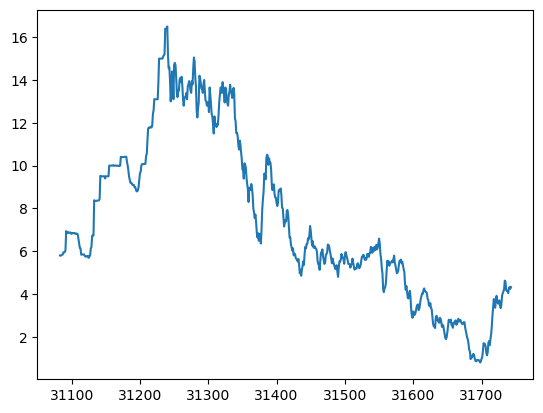

In [10]:
plt.plot(df['OBS_VALUE'])

## **Use the new standard way to download the data**


<font size="3">
The OECD updated the way to query their data. The put a guide in the following  <a href="https://gitlab.algobank.oecd.org/public-documentation/dotstat-migration/-/raw/main/OECD_Data_API_documentation.pdf" target="_blank">link.</a><BR>
    
<font size="3">In any case, we will explain how to perform the queries easily. You will need some particular information like the database, the country or countries codes, the frequency, the indicator, the unit of measurement or the start period. Most of them are self explanatory or we have mentioned them earlier in the notebook. Let's watch an example for the long term interest rates for USA, JAPAN and GERMANY, on a monthly basis, for a per annum measure and a start period of January 1955

In [11]:
database = '@DF_FINMARK,4.0'
country_code = 'USA+JPN+DEU'
frequency = 'M'
indicator = 'IRLT'
unit_of_measure = 'PA'
start_period = '1955-01'


query_text = database+"/"+country_code+"."+frequency+"."+indicator+"."+unit_of_measure+".....?startPeriod="+start_period+"&dimensionAtObservation=AllDimensions"


url = f"https://sdmx.oecd.org/public/rest/data/OECD.SDD.STES,DSD_STES{query_text}"
headers = { 'User-Agent': 'Mozilla/5.0','Accept':  'application/vnd.sdmx.data+csv; charset=utf-8' } 

download = requests.get(url = url,headers = headers)
df2 = pd.read_csv(io.StringIO(download.text))
df2

,DATAFLOW,REF_AREA,FREQ,MEASURE,UNIT_MEASURE,ACTIVITY,ADJUSTMENT,TRANSFORMATION,TIME_HORIZ,METHODOLOGY,TIME_PERIOD,OBS_VALUE,OBS_STATUS,UNIT_MULT,DECIMALS,BASE_PER
0,OECD.SDD.STES:DSD_STES@DF_FINMARK(4.0),USA,M,IRLT,PA,_Z,_Z,_Z,_Z,N,2022-06,3.140,A,0,2,NaN
1,OECD.SDD.STES:DSD_STES@DF_FINMARK(4.0),USA,M,IRLT,PA,_Z,_Z,_Z,_Z,N,2022-07,2.900,A,0,2,NaN
2,OECD.SDD.STES:DSD_STES@DF_FINMARK(4.0),JPN,M,IRLT,PA,_Z,_Z,_Z,_Z,N,1989-03,5.147,A,0,2,NaN
3,OECD.SDD.STES:DSD_STES@DF_FINMARK(4.0),JPN,M,IRLT,PA,_Z,_Z,_Z,_Z,N,1989-04,5.221,A,0,2,NaN
4,OECD.SDD.STES:DSD_STES@DF_FINMARK(4.0),JPN,M,IRLT,PA,_Z,_Z,_Z,_Z,N,1989-05,5.174,A,0,2,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2075,OECD.SDD.STES:DSD_STES@DF_FINMARK(4.0),USA,M,IRLT,PA,_Z,_Z,_Z,_Z,N,2022-01,1.760,A,0,2,NaN
2076,OECD.SDD.STES:DSD_STES@DF_FINMARK(4.0),USA,M,IRLT,PA,_Z,_Z,_Z,_Z,N,2022-02,1.930,A,0,2,NaN
2077,OECD.SDD.STES:DSD_STES@DF_FINMARK(4.0),USA,M,IRLT,PA,_Z,_Z,_Z,_Z,N,2022-03,2.130,A,0,2,NaN
2078,OECD.SDD.STES:DSD_STES@DF_FINMARK(4.0),USA,M,IRLT,PA,_Z,_Z,_Z,_Z,N,2022-04,2.750,A,0,2,NaN


## **Plot the information**


<font size="3">
We can plot the information very easily using the function plot from the library matplotlib.pyplot. We did some other formatting to the chart to make it nices. If you would like to know how to make these kind of plots, please take a look at our course <a href="https://quant-trading.co/cursos/data-science-for-trading/" target="_blank">"Introductory Data Science for Investing and Trading".</a><BR>
    
<font size="3">Below we show how to do that:

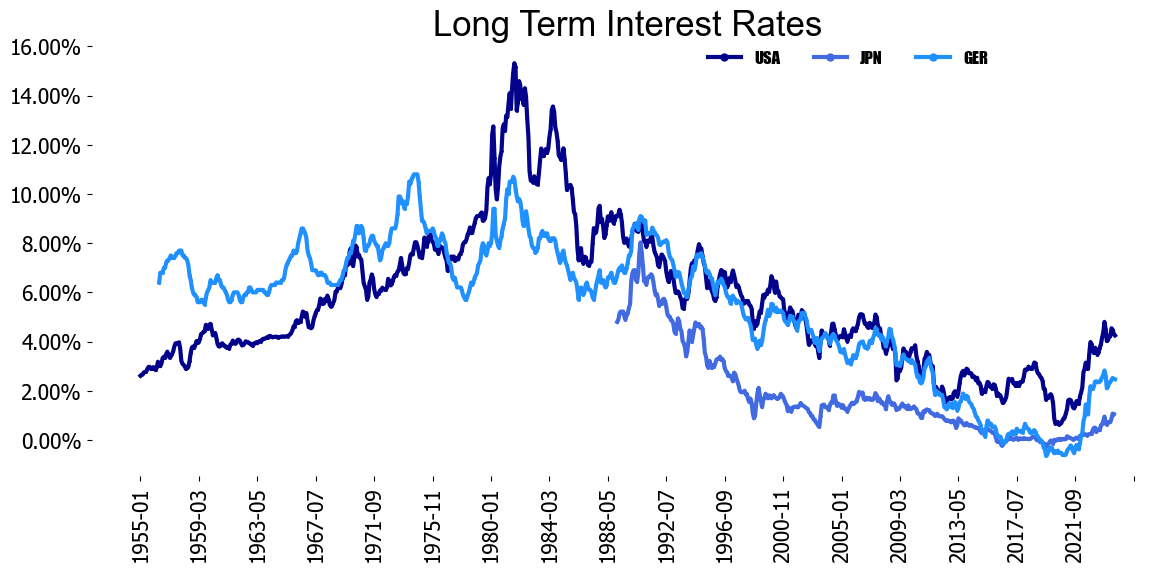

In [12]:
df2.sort_values(by='TIME_PERIOD',inplace=True)
df_USA = df2.loc[df2['REF_AREA'] ==  'USA']
df_JPN = df2.loc[df2['REF_AREA'] ==  'JPN']
df_GER = df2.loc[df2['REF_AREA'] ==  'DEU']

#----------------------------------------------------CREATE CHART----------------------------------------------------------#
import matplotlib.ticker as ticker
import matplotlib.font_manager as font_manager
import matplotlib.ticker as ticker
from matplotlib.ticker import FormatStrFormatter


font = font_manager.FontProperties(family='Impact',weight='bold', style='normal', size=12)
tick_spacing = 50
i = 0

fig = plt.figure()

ax = fig.add_subplot(1,1,1)

ax.plot(df_USA['TIME_PERIOD'],df_USA['OBS_VALUE'],marker='o', linestyle='solid',linewidth=3,color='darkblue',label='USA',alpha=0.99,markersize=1)
ax.plot(df_JPN['TIME_PERIOD'],df_JPN['OBS_VALUE'],marker='o', linestyle='solid',linewidth=3,color='royalblue',label='JPN',alpha=0.99,markersize=1)
ax.plot(df_GER['TIME_PERIOD'],df_GER['OBS_VALUE'],marker='o', linestyle='solid',linewidth=3,color='dodgerblue',label='GER',alpha=0.99,markersize=1)

ax.xaxis.set_major_locator(ticker.MultipleLocator(tick_spacing))
ax.legend(frameon=False,prop=font,loc=1, bbox_to_anchor=(0.85, 1.02),ncol=10,markerscale=5)
plt.xticks(rotation=90)
plt.yticks(fontname = "Tahoma",fontsize=15)
plt.xticks(fontname = "Tahoma",fontsize=15)
ax.axis([None, None, None, None])
ax.yaxis.set_major_formatter(FormatStrFormatter('%2.2f%%'))
plt.title("Long Term Interest Rates", size=25, family='Arial')
plt.box(on=None)
ax.set_facecolor('white') 

plt.subplots_adjust(bottom=0.1, right=1.8, top=1.0)

plt.show()

## **Use the new standard way to download the data**


<font size="3">
A good thing is that we can search for all that information of the parameters in the OECD web page in the following <a href="https://data-explorer.oecd.org/" target="_blank">link.</a><BR>
    
<font size="3">Now we are showing an example on how to download data of the Composite Leading Indicators for a group of countries. Please try going to the webpage and getting the information to put in the parameters

In [13]:
database = '@DF_CLI'
country_code = 'JPN+DEU+FRA+CAN+AUS'
frequency = 'M'
indicator = 'LI..'
unit_of_measure = 'AA...'
start_period = '2023-01'


query_text = database+"/"+country_code+"."+frequency+"."+indicator+"."+unit_of_measure+"?startPeriod="+start_period+"&dimensionAtObservation=AllDimensions"


url = f"https://sdmx.oecd.org/public/rest/data/OECD.SDD.STES,DSD_STES{query_text}"
headers = { 'User-Agent': 'Mozilla/5.0','Accept':  'application/vnd.sdmx.data+csv; charset=utf-8' } 

download = requests.get(url = url,headers = headers)
df3 = pd.read_csv(io.StringIO(download.text))
df3

,DATAFLOW,REF_AREA,FREQ,MEASURE,UNIT_MEASURE,ACTIVITY,ADJUSTMENT,TRANSFORMATION,TIME_HORIZ,METHODOLOGY,TIME_PERIOD,OBS_VALUE,OBS_STATUS,UNIT_MULT,DECIMALS,BASE_PER
0,OECD.SDD.STES:DSD_STES@DF_CLI(4.1),AUS,M,LI,IX,_Z,AA,IX,_Z,H,2024-07,NaN,A,0,2,NaN
1,OECD.SDD.STES:DSD_STES@DF_CLI(4.1),CAN,M,LI,IX,_Z,AA,IX,_Z,H,2023-01,98.53239,A,0,2,NaN
2,OECD.SDD.STES:DSD_STES@DF_CLI(4.1),AUS,M,LI,IX,_Z,AA,IX,_Z,H,2023-03,99.32943,A,0,2,NaN
3,OECD.SDD.STES:DSD_STES@DF_CLI(4.1),AUS,M,LI,IX,_Z,AA,IX,_Z,H,2023-04,99.21564,A,0,2,NaN
4,OECD.SDD.STES:DSD_STES@DF_CLI(4.1),AUS,M,LI,IX,_Z,AA,IX,_Z,H,2023-05,99.11137,A,0,2,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90,OECD.SDD.STES:DSD_STES@DF_CLI(4.1),JPN,M,LI,IX,_Z,AA,IX,_Z,H,2024-04,99.98034,A,0,2,NaN
91,OECD.SDD.STES:DSD_STES@DF_CLI(4.1),JPN,M,LI,IX,_Z,AA,IX,_Z,H,2024-05,100.01360,A,0,2,NaN
92,OECD.SDD.STES:DSD_STES@DF_CLI(4.1),JPN,M,LI,IX,_Z,AA,IX,_Z,H,2024-06,100.03710,A,0,2,NaN
93,OECD.SDD.STES:DSD_STES@DF_CLI(4.1),JPN,M,LI,IX,_Z,AA,IX,_Z,H,2024-07,NaN,A,0,2,NaN


<font size="3">If this content is helpful and you want to make a donation please click on the button

[![paypal](https://www.paypalobjects.com/en_US/i/btn/btn_donateCC_LG.gif)](https://www.paypal.com/cgi-bin/webscr?cmd=_s-xclick&hosted_button_id=29CVY97MEQ9BY)